<a href="https://colab.research.google.com/github/pdthang26/Artificial-Intellignece-ST7-1234/blob/main/AI_ST7_31_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(train_images, train_labels ), (test_images, test_labels)= mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

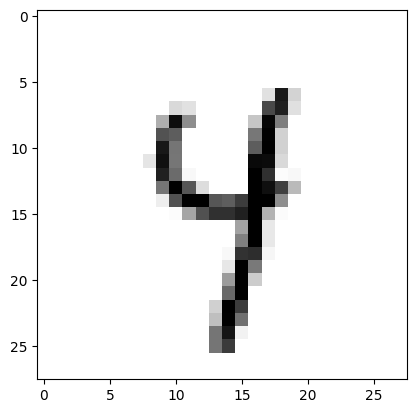

so: 4


In [ ]:
import matplotlib.pyplot as plt
digit = train_images[26]
plt. imshow(digit, cmap = plt.cm.binary)
plt.show()
print('so:', train_labels[26])

<ipython-input-77-659b11a0e806>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


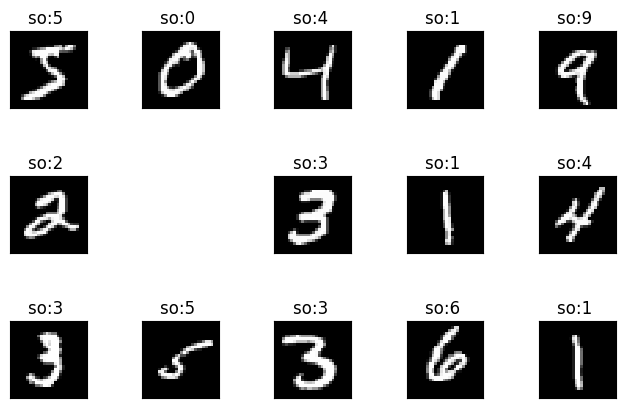

In [ ]:
for i in range (15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap= 'gray',interpolation='none')
  plt.title('so:{} '.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512,activation = 'relu', input_shape = (28*28,)))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X= test_images
Y= test_labels

In [ ]:
train_images= train_images.reshape(60000,28*28)
train_images = train_images.astype('float32')/255
test_images = test_images.reshape(10000,28*28)
test_images = test_images.astype('float32')/255

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [ ]:
test_labels.shape

(10000, 10)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
model.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics= 'accuracy')
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("loss;" , test_loss)
print("Accuracy:", test_acc)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2628 - accuracy: 0.9241
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1071 - accuracy: 0.9686
Epoch 3/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0704 - accuracy: 0.9788
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0513 - accuracy: 0.9846
Epoch 5/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0389 - accuracy: 0.9882
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0294 - accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0225 - accuracy: 0.9932
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0173 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0128 - accuracy: 0.9968
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy:

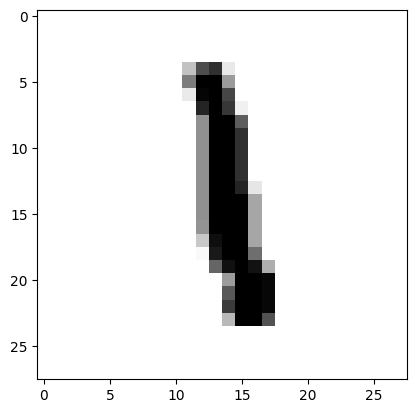

so: 1


In [ ]:
digit = X[2612]
plt. imshow(digit, cmap = plt.cm.binary)
plt.show()
print('so:', Y[2612])

In [ ]:
x_pred = X[2612].reshape(1,28*28)
x_pred = x_pred.astype('float32')/255

y_pred = model.predict(x_pred)
print(y_pred)

1/1 [==============================] - 0s 54ms/step
[[1.5025007e-12 9.9998283e-01 1.8421108e-08 2.2112509e-07 1.5707036e-06
  1.6446904e-09 1.4491625e-10 2.4863835e-08 1.5304026e-05 2.2996254e-08]]


In [ ]:
import numpy as np

np.argmax(model.predict(x_pred), axis = 1)

1/1 [==============================] - 0s 21ms/step


array([1])

In [ ]:
model.save('test1.h5') #sau nay goi model10 = load_model('test1.h5')///// model10.predict()